# 1. import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mlt
import seaborn as sb
sb.set()

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# 2. load data

In [7]:
df = pd.read_excel(r"D:\Desktop\jhk\elevate labs 2\3\Housing.xlsx")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [9]:
df.describe(include = 'all'), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


(               price          area    bedrooms   bathrooms     stories  \
 count   5.450000e+02    545.000000  545.000000  545.000000  545.000000   
 unique           NaN           NaN         NaN         NaN         NaN   
 top              NaN           NaN         NaN         NaN         NaN   
 freq             NaN           NaN         NaN         NaN         NaN   
 mean    4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
 std     1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
 min     1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
 25%     3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
 50%     4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
 75%     5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
 max     1.330000e+07  16200.000000    6.000000    4.000000    4.000000   
 
        mainroad guestroom basement hotwaterheating airconditioning  \
 count       545       545 

# 3. Cleaning

## 3.1 drop

In [10]:
data_1 = df.drop(['hotwaterheating'], axis=1)
data_1.describe(include = 'all')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


## 3.2 missing values

In [11]:
data_1.isnull(), data_1.isnull().sum()

(     price   area  bedrooms  bathrooms  stories  mainroad  guestroom  \
 0    False  False     False      False    False     False      False   
 1    False  False     False      False    False     False      False   
 2    False  False     False      False    False     False      False   
 3    False  False     False      False    False     False      False   
 4    False  False     False      False    False     False      False   
 ..     ...    ...       ...        ...      ...       ...        ...   
 540  False  False     False      False    False     False      False   
 541  False  False     False      False    False     False      False   
 542  False  False     False      False    False     False      False   
 543  False  False     False      False    False     False      False   
 544  False  False     False      False    False     False      False   
 
      basement  airconditioning  parking  prefarea  furnishingstatus  
 0       False            False    False     False 

## 3.3 outlier

### 3.3.1 price

<Axes: xlabel='price', ylabel='Count'>

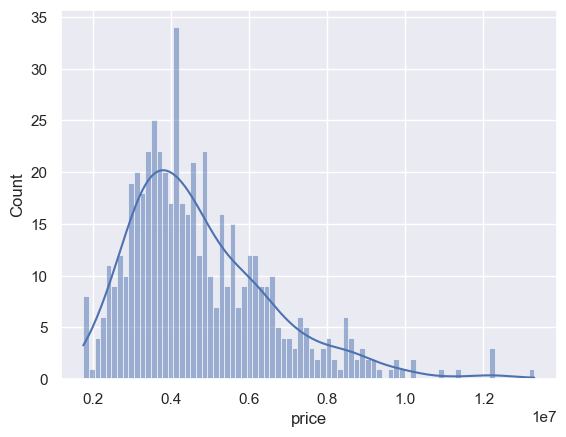

In [13]:
sb.histplot(data_1['price'], kde=True, bins=80)

In [15]:
q  = data_1['price'].quantile(0.99)
print(q)
data_1_P = data_1[  data_1['price']<q  ]
data_1_P.describe(include= 'all')

10541999.999999963


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
count,5.390000e+02,539.000000,539.000000,539.000000,539.000000,539,539,539,539,539.000000,539,539
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,462,443,352,372,NaN,415,225
mean,4.685700e+06,5117.411874,2.957328,1.274583,1.799629,NaN,NaN,NaN,NaN,0.675325,NaN,NaN
std,1.712754e+06,2156.687235,0.736740,0.482716,0.864801,NaN,NaN,NaN,NaN,0.847237,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3577.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.319000e+06,4510.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.696250e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


Text(0.5, 1.0, 'after')

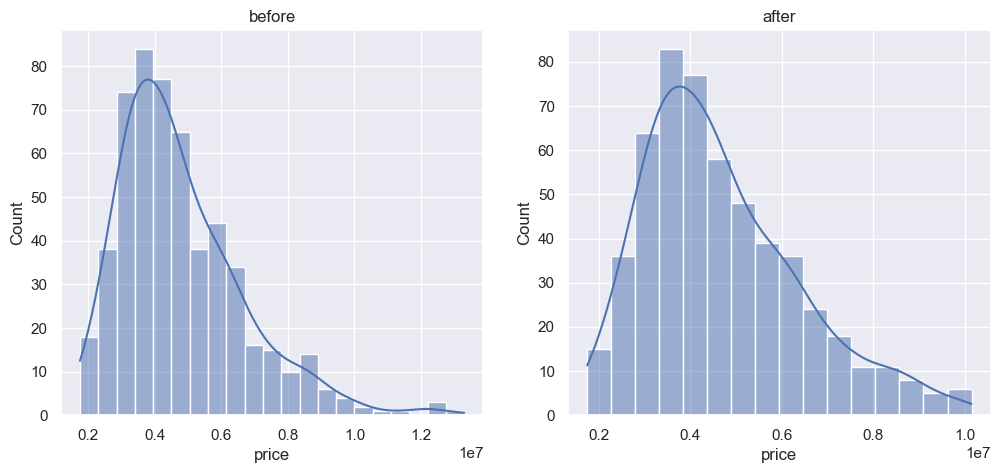

In [16]:
mlt.figure(figsize=(12, 5))

mlt.subplot(1, 2, 1)
sb.histplot( data_1['price'], kde=True)
mlt.title('before')

mlt.subplot(1, 2, 2)
sb.histplot( data_1_P['price'], kde=True)
mlt.title('after')

### 3.3.2 area

(<Axes: xlabel='area', ylabel='Count'>,
               price          area    bedrooms   bathrooms     stories  \
 count  5.390000e+02    539.000000  539.000000  539.000000  539.000000   
 mean   4.685700e+06   5117.411874    2.957328    1.274583    1.799629   
 std    1.712754e+06   2156.687235    0.736740    0.482716    0.864801   
 min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
 25%    3.430000e+06   3577.000000    2.000000    1.000000    1.000000   
 50%    4.319000e+06   4510.000000    3.000000    1.000000    2.000000   
 75%    5.696250e+06   6360.000000    3.000000    2.000000    2.000000   
 max    1.015000e+07  16200.000000    6.000000    3.000000    4.000000   
 
           parking  
 count  539.000000  
 mean     0.675325  
 std      0.847237  
 min      0.000000  
 25%      0.000000  
 50%      0.000000  
 75%      1.000000  
 max      3.000000  )

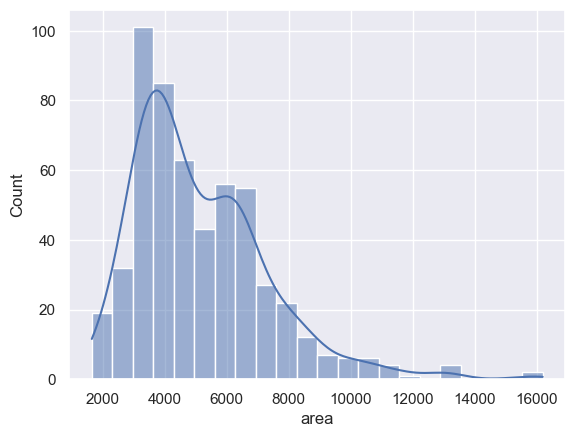

In [17]:
sb.histplot( data_1['area'], kde=True),  data_1_P.describe()


In [18]:
q = data_1_P['area'].quantile(0.99)
print(q)

data_2_A = data_1_P[  data_1_P['area']<q  ]
data_2_A.describe(include = 'all')

12592.200000000004


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
count,5.330000e+02,533.000000,533.000000,533.000000,533.000000,533,533,533,533,533.000000,533,533
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,456,437,348,368,NaN,410,224
mean,4.661106e+06,5017.337711,2.954972,1.273921,1.804878,NaN,NaN,NaN,NaN,0.669794,NaN,NaN
std,1.686875e+06,1944.663203,0.734385,0.478892,0.866793,NaN,NaN,NaN,NaN,0.845025,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3540.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.305000e+06,4500.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.600000e+06,6300.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


Text(0.5, 1.0, 'after')

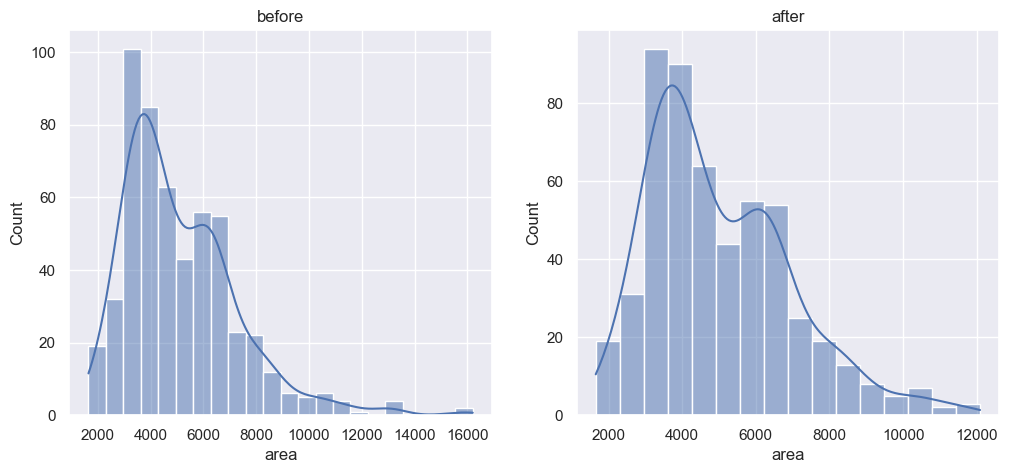

In [19]:
mlt.figure( figsize=(12,5))

mlt.subplot(1,2,1)
sb.histplot( data_1_P['area'], kde=True)
mlt.title('before')

mlt.subplot(1,2,2)
sb.histplot( data_2_A['area'], kde=True)
mlt.title('after')

### 

In [22]:
data_cleaned = data_2_A.reset_index(drop =True)

In [23]:
data_cleaned.describe(include= 'all')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
count,5.330000e+02,533.000000,533.000000,533.000000,533.000000,533,533,533,533,533.000000,533,533
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,456,437,348,368,NaN,410,224
mean,4.661106e+06,5017.337711,2.954972,1.273921,1.804878,NaN,NaN,NaN,NaN,0.669794,NaN,NaN
std,1.686875e+06,1944.663203,0.734385,0.478892,0.866793,NaN,NaN,NaN,NaN,0.845025,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3540.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.305000e+06,4500.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.600000e+06,6300.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


# 4. OSL Assumption

Text(0.5, 0, 'Area')

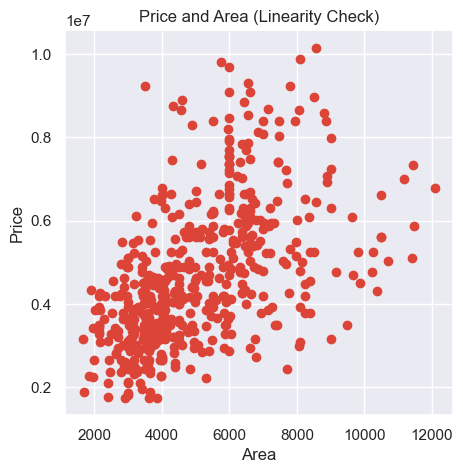

In [37]:
mlt.figure( figsize=(5,5))

mlt.scatter( x=data_cleaned['area'], y=data_cleaned['price'], c='#DB4437' )
mlt.title('Price and Area (Linearity Check)')
mlt.ylabel('Price')
mlt.xlabel('Area')

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
variables = data_cleaned[ ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']  ]
vif = pd.DataFrame()
vif['VIF'] = [ variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns
vif

,VIF,Features
0,7.452847,area
1,13.972159,bedrooms
2,9.479650,bathrooms
3,6.691803,stories
4,1.862572,parking


In [39]:
data_no_mcoll = data_cleaned.drop( ['bedrooms'], axis=1  )

# 5.Binary Mapping

In [42]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'airconditioning', 'prefarea']
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

data_BinaryMap=data_no_mcoll
data_BinaryMap[binary_cols] = data_BinaryMap[binary_cols].apply(binary_map)

In [43]:
data_BinaryMap

,price,area,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
0,10150000,8580,3,4,1,0,0,1,2,1,semi-furnished
1,9870000,8100,1,2,1,1,1,1,2,1,furnished
2,9800000,5750,2,4,1,1,0,1,1,1,unfurnished
3,9681000,6000,3,2,1,1,1,0,2,0,semi-furnished
4,9310000,6550,2,2,1,0,0,1,1,1,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...
528,1820000,3000,1,1,1,0,1,0,2,0,unfurnished
529,1767150,2400,1,1,0,0,0,0,0,0,semi-furnished
530,1750000,3620,1,1,1,0,0,0,0,0,unfurnished
531,1750000,2910,1,1,0,0,0,0,0,0,furnished


# 6. Dummy Variables

In [50]:
data_WithDumy = pd.get_dummies( data_BinaryMap, drop_first= True, dtype=int )

In [51]:
data_WithDumy.head()

,price,area,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,10150000,8580,3,4,1,0,0,1,2,1,1,0
1,9870000,8100,1,2,1,1,1,1,2,1,0,0
2,9800000,5750,2,4,1,1,0,1,1,1,0,1
3,9681000,6000,3,2,1,1,1,0,2,0,1,0
4,9310000,6550,2,2,1,0,0,1,1,1,1,0


In [52]:
data_WithDumy.columns.values

array(['price', 'area', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype=object)

In [53]:
data_processed = data_WithDumy
data_processed.head()

,price,area,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,10150000,8580,3,4,1,0,0,1,2,1,1,0
1,9870000,8100,1,2,1,1,1,1,2,1,0,0
2,9800000,5750,2,4,1,1,0,1,1,1,0,1
3,9681000,6000,3,2,1,1,1,0,2,0,1,0
4,9310000,6550,2,2,1,0,0,1,1,1,1,0


# 7. Linear Regression

### 7.1 declare the inputs and targets

In [57]:
target = data_processed['price']  
inputs = data_processed.drop(['price'], axis=1)

### 7.2 scale the data

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

,copy,True
,with_mean,True
,with_std,True


In [59]:
inputs_scaled = scaler.transform(inputs)

### 7.3 train Teest Split

In [60]:
from sklearn.model_selection import train_test_split

x_train,  x_test, y_train, y_test = train_test_split( inputs_scaled,  target, test_size=0.2, random_state=100)

In [61]:
x_train.shape, x_test.shape

((426, 11), (107, 11))

### 7.4 create regression

In [62]:
reg = LinearRegression()
reg.fit( x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [63]:
y_hat =reg.predict( x_train)

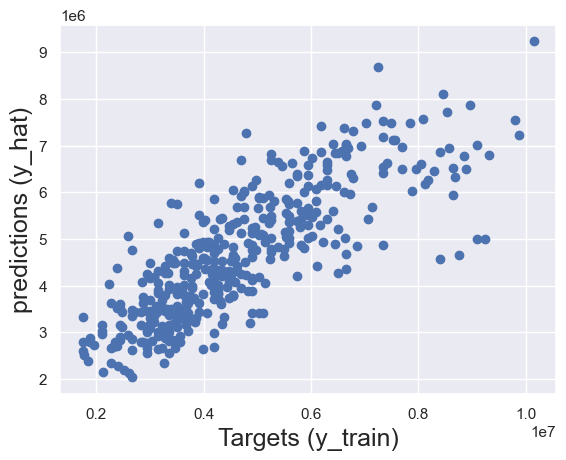

In [66]:
mlt.scatter( y_train, y_hat)

mlt.xlabel('Targets (y_train)', size=18)
mlt.ylabel('predictions (y_hat)', size=18)

mlt.show()

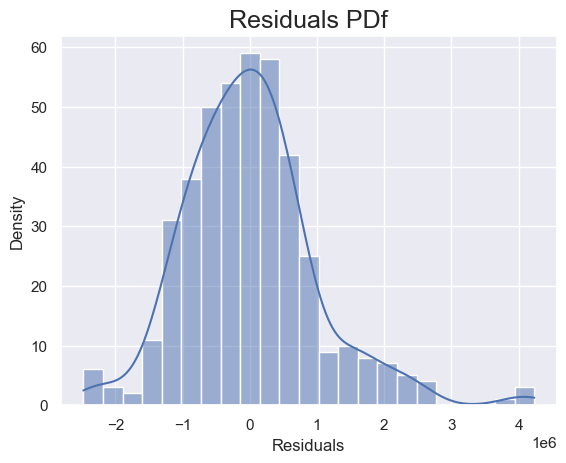

In [67]:
sb.histplot( y_train - y_hat, kde=True)
mlt.title( 'Residuals PDf' ,size=18)
mlt.xlabel('Residuals') 
mlt.ylabel('Density') 
mlt.show()

In [68]:
reg.score( x_train, y_train)

0.6585084558643088

# 8 TEsting

In [69]:
y_hat_test = reg.predict(x_test)

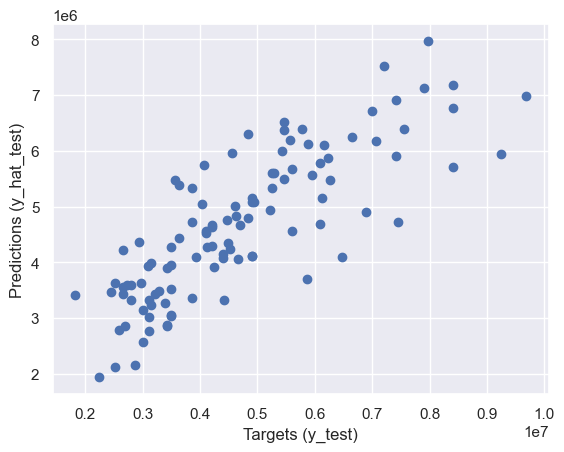

In [72]:
mlt.scatter( y_test, y_hat_test)
mlt.xlabel('Targets (y_test)')
mlt.ylabel('Predictions (y_hat_test)')

mlt.show()